In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y_true = iris.target  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

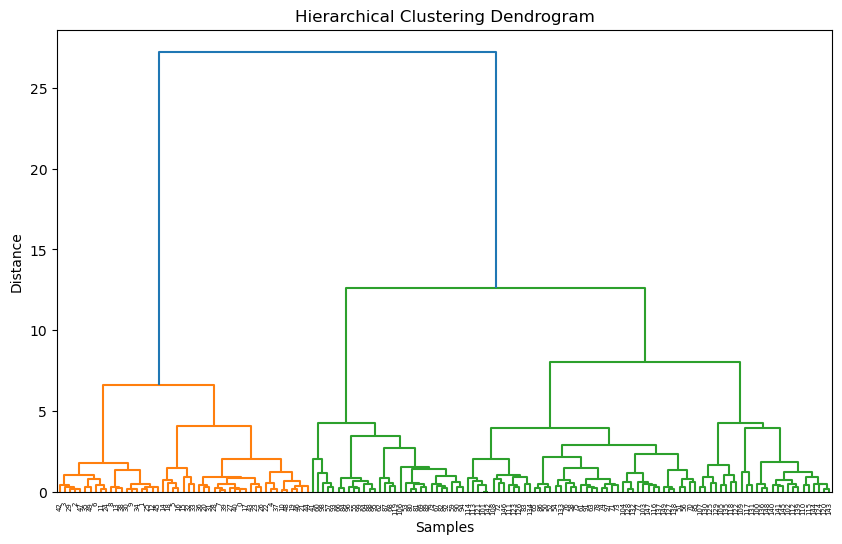

In [4]:
Z = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=None, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [5]:
k = 3 
y_hc = fcluster(Z, t=k, criterion='maxclust') - 1

In [8]:
sil_score = silhouette_score(X_scaled, y_hc)
ari_score = adjusted_rand_score(y_true, y_hc)

print(f"Silhouette Score: {sil_score:.2f}")
print(f"Adjusted Rand Index (vs true labels): {ari_score:.2f}")

cm = confusion_matrix(y_true, y_hc)
print("\nConfusion Matrix:\n", cm)

Silhouette Score: 0.45
Adjusted Rand Index (vs true labels): 0.62

Confusion Matrix:
 [[49  1  0]
 [ 0 27 23]
 [ 0  2 48]]


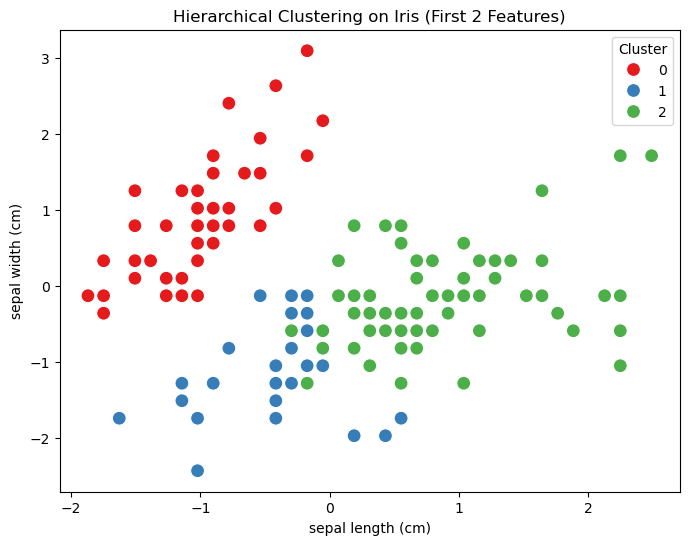

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_hc, palette='Set1', s=100)
plt.title("Hierarchical Clustering on Iris (First 2 Features)")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()